In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
Auto = pd.read_csv('/content/gdrive/MyDrive/ISLR/Auto.csv',na_values='?').dropna()
Auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320


In [ ]:
X = Auto.iloc[:,1:8]
Y = Auto.iloc[:,0]

In [ ]:
lm1 = smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin',data=Auto).fit()
lm1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-17.2184,4.644,-3.707,0.000,-26.350,-8.087
cylinders,-0.4934,0.323,-1.526,0.128,-1.129,0.142
displacement,0.0199,0.008,2.647,0.008,0.005,0.035
horsepower,-0.0170,0.014,-1.230,0.220,-0.044,0.010
weight,-0.0065,0.001,-9.929,0.000,-0.008,-0.005
acceleration,0.0806,0.099,0.815,0.415,-0.114,0.275
year,0.7508,0.051,14.729,0.000,0.651,0.851
origin,1.4261,0.278,5.127,0.000,0.879,1.973


In [ ]:
lm_fit = LinearRegression()
lm_fit.fit(X,Y)
print(lm_fit.coef_)
print(lm_fit.intercept_)

[-0.49337632  0.01989564 -0.01695114 -0.00647404  0.08057584  0.75077268
  1.4261405 ]
-17.218434622017536


In [ ]:
lm = smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin',data=Auto).fit()
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-17.2184,4.644,-3.707,0.000,-26.350,-8.087
cylinders,-0.4934,0.323,-1.526,0.128,-1.129,0.142
displacement,0.0199,0.008,2.647,0.008,0.005,0.035
horsepower,-0.0170,0.014,-1.230,0.220,-0.044,0.010
weight,-0.0065,0.001,-9.929,0.000,-0.008,-0.005
acceleration,0.0806,0.099,0.815,0.415,-0.114,0.275
year,0.7508,0.051,14.729,0.000,0.651,0.851
origin,1.4261,0.278,5.127,0.000,0.879,1.973


In [ ]:
lm_fit = LinearRegression()
lm_fit.fit(X,Y)
lm_fit.coef_


array([-0.49337632,  0.01989564, -0.01695114, -0.00647404,  0.08057584,
        0.75077268,  1.4261405 ])

In [ ]:
lm_fit_R = Ridge(alpha=1000)
lm_fit_R.fit(X,Y)
lm_fit_R.coef_

array([-0.03550905,  0.00248971, -0.01210813, -0.00643065,  0.03662756,
        0.60962732,  0.17595301])

In [ ]:
lm_fit_L = Lasso(alpha=1)
lm_fit_L.fit(X,Y)
lm_fit_L.coef_

array([-0.        ,  0.        , -0.00734394, -0.00646937,  0.        ,
        0.66308442,  0.        ])

In [ ]:

regi = Ridge()
regi.fit(X,Y)
regi.coef_


array([-0.48766469,  0.01973747, -0.01682864, -0.00647685,  0.08058275,
        0.75062291,  1.41586743])

In [ ]:

lasso = Lasso(alpha=1)
lasso.fit(X,Y)
lasso.coef_

array([-0.        ,  0.        , -0.00734394, -0.00646937,  0.        ,
        0.66308442,  0.        ])

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5


In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)


(100, 7)

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
ridge = Lasso()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)


(100, 7)

Text(0, 0.5, 'weights')

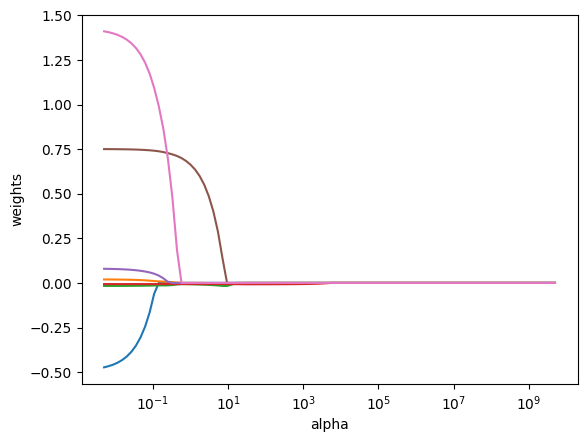

In [ ]:

import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(313, 7)

In [ ]:
ridge2 = Ridge(alpha = 4)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

cylinders      -0.132323
displacement    0.016925
horsepower     -0.006320
weight         -0.007075
acceleration    0.187957
year            0.738185
origin          1.330607
dtype: float64
12.030173172399207


In [ ]:
ridge3 = Ridge(alpha = 10**10)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

cylinders      -1.921595e-07
displacement   -1.207963e-05
horsepower     -4.141260e-06
weight         -1.030826e-04
acceleration    1.659249e-07
dtype: float64
63.721895414957395


In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

16.372745814388658

In [ ]:
Lassocv = LassoCV(alphas = alphas)
Lassocv.fit(X_train, y_train)
Lassocv.alpha_

0.0466301673441609

In [ ]:
ridge4 = Ridge(alpha = ridgecv.alpha_)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

12.066388806662767

In [ ]:
lasso4 = Lasso(alpha = Lassocv.alpha_)
lasso4.fit(X_train, y_train)
mean_squared_error(y_test, lasso4.predict(X_test))

12.122326795548707

In [ ]:
ridge4.fit(X, Y)
pd.Series(ridge4.coef_, index = X.columns)

cylinders      -0.413218
displacement    0.017622
horsepower     -0.015192
weight         -0.006513
acceleration    0.080460
year            0.748272
origin          1.275031
dtype: float64

In [ ]:
lasso4.fit(X, Y)
pd.Series(lasso4.coef_, index = X.columns)

cylinders      -0.305769
displacement    0.015825
horsepower     -0.015861
weight         -0.006489
acceleration    0.068074
year            0.746681
origin          1.281903
dtype: float64

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/ISLR/Boston.csv',index_col=0)
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [ ]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
X = df.iloc[:,0:13]
Y = df.iloc[:,-1]

In [ ]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45


In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets


X_train, X_test , y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5


In [ ]:
lassocv = LassoCV(alphas = alphas)
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.005

In [ ]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.0466301673441609

In [ ]:
Lasso1 = Lasso(alpha = lassocv.alpha_)
Lasso1.fit(X_train, y_train)
mean_squared_error(y_test, Lasso1.predict(X_test))

18.55336719429718

In [ ]:
redgi1 = Ridge(alpha = ridgecv.alpha_)
redgi1.fit(X_train, y_train)
mean_squared_error(y_test, redgi1.predict(X_test))

18.5204959732037

In [ ]:
Lasso1.fit(X, Y)
pd.Series(Lasso1.coef_, index = X.columns)

crim       -0.107119
zn          0.046640
indus       0.013518
chas        2.595461
nox       -16.080464
rm          3.812029
age        -0.000563
dis        -1.448856
rad         0.302287
tax        -0.012481
ptratio    -0.934558
black       0.009399
lstat      -0.527620
dtype: float64

In [ ]:
mean_value=df['weight'].mean()
df['weight'].fillna(value=mean_value, inplace=True)

In [ ]:
mode_value=df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(value=mode_value, inplace=True)

In [ ]:
df.drop([["",""]])

In [ ]:
X = df.iloc[:,0:11]
Y =df[:,-1]

In [ ]:
rom sklearn.model_selection import train_test_split
# Split data into training and test sets

X_train, X_test , y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
alphas = 10**np.linspace(20,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

In [ ]:
df.get_dumm